# OCR Biển số xe Việt Nam
## Notebook này chạy trên Google Colab
Tools:<br>
    &emsp;YoloV5 cho detection<br>
    &emsp;EasyOCR cho recognition

Link split data
    &emsp;https://drive.google.com/file/d/1yVFpjyV0INnvLpM2_LpfuNm14_Dd53Kc/view?usp=share_link

### Clone repo Yolo5

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.5/78.2 GB disk)


### Download data set
Data đã được split thành 3 thư mục, train, valid, test.
Data gồm hình ảnh và thông số mô hình yolo cho biển số xe trong hình

In [ ]:
%cd ..
!pip install --upgrade --no-cache-dir gdown
from google.colab import drive
drive.mount('/content/drive')

!gdown --id 1yVFpjyV0INnvLpM2_LpfuNm14_Dd53Kc
!pip install unrar
!unrar x yolo_plate_dataset_split.rar

Streaming output truncated to the last 5000 lines.
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2283.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2284.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2285.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2286.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2287.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2288.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2289.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen229.txt        99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2290.txt       99%  OK 
Extracting  yolo_plate_dataset/labels/train/CarLongPlateGen2291.txt       99%  OK 
Extracting  yolo_plate_datase

## Detection

### Copy file custom_data.yml vào thư mục yolov5/data
custom_data.yml khai báo đường dẫn cho các thư mục train/valid/test và chỉ có 1 class duy nhất để detect là license plate

### Train network

In [ ]:
# %cd yolov5
!python yolov5/train.py --img 640 --batch 16 --epochs 10 --data custom_data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom_data.yaml, hyp=yolov5/data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=yolov5/runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_

### Detect biển số xe với model đã train
Mô hình best.pt, được lưu trong thư mục yolo5/runs/train/exp/weights sẽ được sử dụng để test detection trong một số hình trong dataset test

In [ ]:
# !python yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf .25 --source /content/yolo_plate_dataset/images/test/rotatengoaigiao14.jpg
# !python yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf .25 --source /content/yolo_plate_dataset/images/test/CarLongPlate900.jpg
!python yolov5/detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf .25 --source /content/yolo_plate_dataset/images/test/cropquandoi100.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/yolo_plate_dataset/images/test/cropquandoi100.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/yolo_plate_dataset/images/test/cropquandoi100.jpg: 448x640 1 license plate, 13.9ms
Speed: 0.5ms pre-process, 13.9ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp


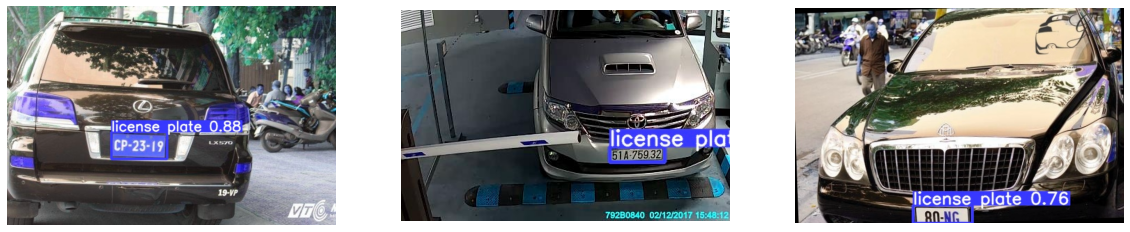

In [ ]:
import matplotlib.pyplot as plt
import cv2

img_test1 = cv2.imread('/content/yolov5/runs/detect/exp/cropquandoi100.jpg')
img_test2 = cv2.imread('/content/yolov5/runs/detect/exp2/CarLongPlate900.jpg')
img_test3 = cv2.imread('/content/yolov5/runs/detect/exp3/rotatengoaigiao14.jpg')

fig, ax = plt.subplots(1, 3, figsize=(20, 16))
[axi.set_axis_off() for axi in ax.ravel()]
plt.subplot(1, 3, 1)
plt.imshow(img_test1)
plt.subplot(1, 3, 2)
plt.imshow(img_test2)
plt.subplot(1, 3, 3)
plt.imshow(img_test3)

## Recognition

Cài đặt thư viện easyocr

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.2/608.2 KB 37.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.6/47.6 MB 20.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.7.0.72
    Uninstalling opencv-python-headless-4.7.0.72:
      Successfully uninstalled opencv-python-headless-4.7.0.72


In [ ]:
import easyocr

Load model

In [ ]:
model = torch.hub.load('./yolov5', 'custom', source='local', path='/content/yolov5/runs/train/exp/weights/best.pt', force_reload=True)
classes = model.names

requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [ ]:
print(classes)

{0: 'license plate'}


### Code để sử dụng easyocr

In [ ]:
import numpy as np


EASY_OCR = easyocr.Reader(['en']) ### initiating easyocr
OCR_TH = 0.2

### -------------------------------------- function to run detection ---------------------------------------------------------
def detectx (frame, model):
    frame = [frame]
    print(f"[INFO] Detecting. . . ")
    results = model(frame)

    labels, cordinates = results.xyxyn[0][:, -1], results.xyxyn[0][:, :-1]

    return labels, cordinates

### ------------------------------------ to plot the BBox and results --------------------------------------------------------
def plot_boxes(results, frame,classes):

    """
    --> This function takes results, frame and classes
    --> results: contains labels and coordinates predicted by model on the given frame
    --> classes: contains the strting labels
    """
    labels, cord = results
    n = len(labels)
    x_shape, y_shape = frame.shape[1], frame.shape[0]

    print(f"[INFO] Total {n} detections. . . ")
    print(f"[INFO] Looping through all detections. . . ")


    ### looping through the detections
    for i in range(n):
        row = cord[i]
        if row[4] >= 0.55: ### threshold value for detection. We are discarding everything below this value
            print(f"[INFO] Extracting BBox coordinates. . . ")
            x1, y1, x2, y2 = int(row[0]*x_shape), int(row[1]*y_shape), int(row[2]*x_shape), int(row[3]*y_shape) ## BBOx coordniates
            text_d = classes[int(labels[i])]

            coords = [x1,y1,x2,y2]

            plate_num = recognize_plate_easyocr(img = frame, coords= coords, reader= EASY_OCR, region_threshold= OCR_TH)


            # if text_d == 'mask':
            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2) ## BBox
            cv2.rectangle(frame, (x1, y1-20), (x2, y1), (0, 255,0), -1) ## for text label background
            cv2.putText(frame, f"{plate_num}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(255,255,255), 2)

    return frame



#### ---------------------------- function to recognize license plate --------------------------------------


# function to recognize license plate numbers using Tesseract OCR
def recognize_plate_easyocr(img, coords,reader,region_threshold):
    # separate coordinates from box
    xmin, ymin, xmax, ymax = coords

    nplate = img[int(ymin):int(ymax), int(xmin):int(xmax)] ### cropping the number plate from the whole image

    ocr_result = reader.readtext(nplate)

    text = filter_text(region=nplate, ocr_result=ocr_result, region_threshold= region_threshold)

    if len(text) ==1:
        text = text[0].upper()
    return text


### to filter out wrong detections 

def filter_text(region, ocr_result, region_threshold):
    rectangle_size = region.shape[0]*region.shape[1]
    
    plate = [] 
    print(ocr_result)
    for result in ocr_result:
        length = np.sum(np.subtract(result[0][1], result[0][0]))
        height = np.sum(np.subtract(result[0][2], result[0][1]))
        
        if length*height / rectangle_size > region_threshold:
            plate.append(result[1])
    return plate


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
### Main function

def main(img_path=None, vid_path=None,vid_out = None):

    print(f"[INFO] Loading model... ")
    ## loading the custom trained model
    model =  torch.hub.load('yolov5', 'custom', source ='local', path='/content/yolov5/runs/train/exp/weights/best.pt',force_reload=True)

    classes = model.names ### class names in string format




    ### --------------- for detection on image --------------------
    if img_path != None:
        print(f"[INFO] Working with image: {img_path}")

        img_out_name = f"./{img_path.split('/')[-1]}"

        frame = cv2.imread(img_path) ### reading the image
        frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        
        results = detectx(frame, model = model) ### DETECTION HAPPENING HERE    

        frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)

        frame = plot_boxes(results, frame,classes = classes)
        
        cv2.imwrite(f"{img_out_name}",frame) ## saving output result.

    ### --------------- for detection on video --------------------
    elif vid_path !=None:
        print(f"[INFO] Working with video: {vid_path}")

        ## reading the video
        cap = cv2.VideoCapture(vid_path)


        if vid_out: ### creating the video writer if video output path is given

            # by default VideoCapture returns float instead of int
            width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
            height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            fps = int(cap.get(cv2.CAP_PROP_FPS))
            codec = cv2.VideoWriter_fourcc(*'mp4v') ##(*'XVID')
            out = cv2.VideoWriter(vid_out, codec, fps, (width, height))

        # assert cap.isOpened()
        frame_no = 1

        cv2.namedWindow("vid_out", cv2.WINDOW_NORMAL)
        while True:
            # start_time = time.time()
            ret, frame = cap.read()
            if ret  and frame_no %1 == 0:
                print(f"[INFO] Working with frame {frame_no} ")

                frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
                results = detectx(frame, model = model)
                frame = cv2.cvtColor(frame,cv2.COLOR_RGB2BGR)


                frame = plot_boxes(results, frame,classes = classes)
                
                cv2.imshow("vid_out", frame)
                if vid_out:
                    print(f"[INFO] Saving output video. . . ")
                    out.write(frame)

                if cv2.waitKey(5) & 0xFF == ord('q'):
                    break
                frame_no += 1
        
        print(f"[INFO] Clening up. . . ")
        ### releaseing the writer
        out.release()
        
        ## closing all windows
        cv2.destroyAllWindows()


### Chạy main để nhận biết biển số vài hình ảnh và lưu kết quả

In [ ]:
# main(img_path="yolo_plate_dataset/images/test/CarLongPlate925.jpg")
# main(img_path="/content/yolo_plate_dataset/images/test/quandoi101.jpg")
main(img_path="/content/yolo_plate_dataset/images/test/xemayBigPlate243.jpg")

requirements: YOLOv5 requirement "setuptools>=65.5.1" not found, attempting AutoUpdate...


[INFO] Loading model... 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

requirements: 1 package updated per /content/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-120-g3e55763 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


[INFO] Working with image: /content/yolo_plate_dataset/images/test/xemayBigPlate243.jpg
[INFO] Detecting. . . 
[INFO] Total 1 detections. . . 
[INFO] Looping through all detections. . . 
[INFO] Extracting BBox coordinates. . . 
[([[23, 19], [239, 19], [239, 123], [23, 123]], '93-F7', 0.7262630550234973), ([[31, 106], [246, 106], [246, 210], [31, 210]], '7330', 0.9726713299751282)]


### Hiển thị kết quả các hình đã được dùng để nhận biết biển số xe

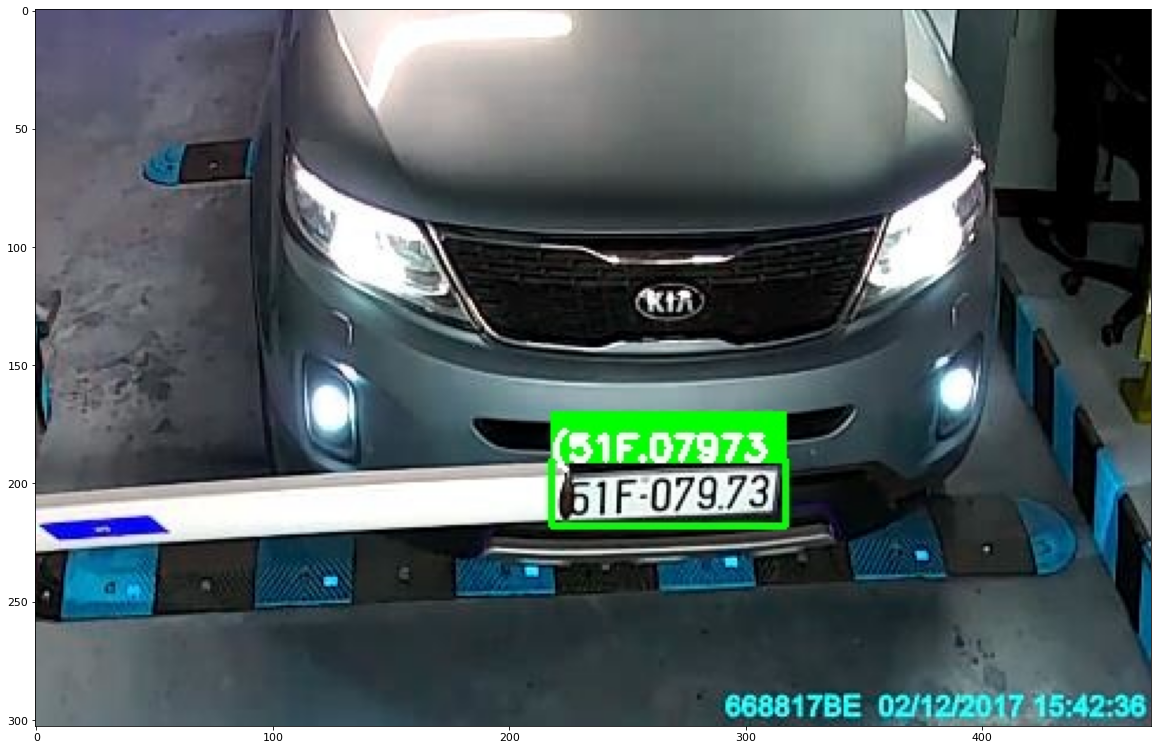

In [ ]:
img_recog_1 = cv2.imread('/content/CarLongPlate925.jpg')
img_recog_2 = cv2.imread('/content/quandoi101.jpg')
img_recog_3 = cv2.imread('/content/xemayBigPlate243.jpg')
fig, ax = plt.subplots(figsize=(20, 16))
plt.imshow(img_recog_1)

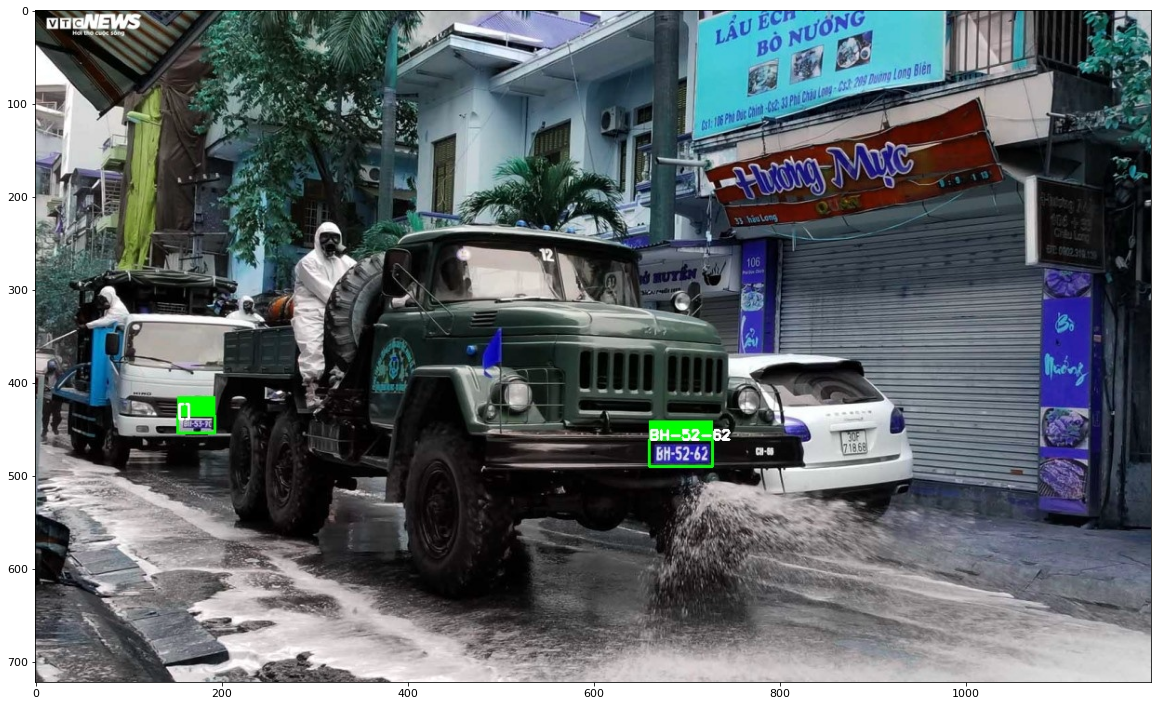

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
plt.imshow(img_recog_2)

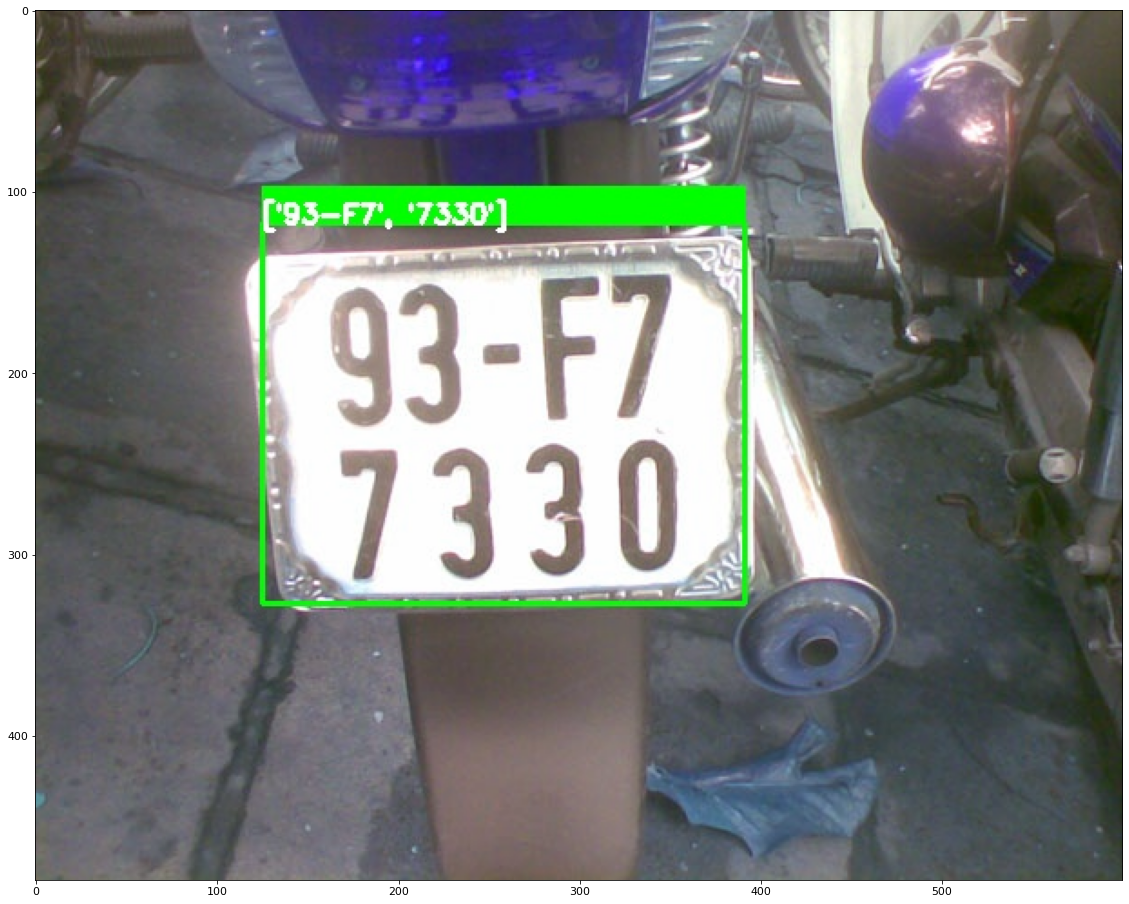

In [ ]:
fig, ax = plt.subplots(figsize=(20, 16))
plt.imshow(img_recog_3)